This project aims to observe human development in the island nation of Saint Kitts and Nevis by observing and analyzing data from https://data.world/hdro/663862f6-ca08-4957-8b5e-51471cedd04f/workspace/file?filename=human-development-indicators-for-saint-kitts-and-nevis-1.csv. this analysis serves as a prlude to the possibility of creatin a data lake solution to analyze the trend in human development indicators in Saint Kitts and Nevis over time. 

Analysis Questions being looked at are  : 

1. What factors contribute the most to human development in Saint Kitts and Nevis and how they have changed over time?

2. What humam factors contribute the most to human development in Saint Kitts and Nevis and how have they changed over time?

Data Wrangling For Data prepration and exploration, the following packages will be useful:

Pandas: For loading, cleaning, and manipulating data.

Numpy: For mathematical and scientific computing.

Scipy : For statistical analysis, optimization, and signal processing.

Stats Model : For linear regression, generalized linear models, and time series analysis. You can use 

Matplotlib : for creating graphs, charts, and plots

Import Packages

In [419]:
import pandas as pd
import numpy as np
import scipy
import scipy.stats as stats
import statsmodels.api as sm
import seaborn as sns
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
import matplotlib.pyplot as plt

Import Dataset Human development indicators for Saint Kitts and Nevis

In [420]:
HumInd = pd.read_csv("C:/Users/admin/Desktop/Entity/Final Project/Datasets/human-development-indicators-for-saint-kitts-and-nevis.csv")

Take a look at the data to observe the structure and get familiar with the contents. 

The `.head()` method is a function that is used to display the first few rows of a data frame or a series. Specifically, .head() returns a new data frame or series that includes the first n rows of the original data, where n is a parameter that you can specify. By default, .head() shows the first 5 rows of the data.

In [421]:
HumInd.head()

,#country+code,#country+name,#indicator+code,#indicator+name,#indicator+value+num,#date+year
0,KNA,Saint Kitts and Nevis,21806,Refugees by country of origin (thousands),0.050000,2017
1,KNA,Saint Kitts and Nevis,31706,Share of seats in parliament (% held by women),13.333333,2017
2,KNA,Saint Kitts and Nevis,44206,Total population (millions),0.055345,2017
3,KNA,Saint Kitts and Nevis,45106,Urban population (%),30.800000,2017
4,KNA,Saint Kitts and Nevis,52606,"Remittances, inflows (% of GDP)",1.124040,2017


The `.shape` attribute is used to show the dimensions of a data frame or a numpy array. Specifically, .shape returns a tuple that contains the number of rows and the number of columns of the data frame or array.

In [422]:
HumInd.shape

(538, 6)

the `.info()` method is used to show the concise summary of a data frame or a series, including the column names, the data types, and the number of non-null values. Specifically, .info() displays the following information for each column:

The column name
The number of non-null values in the column
The data type of the column
The amount of memory used by the column

In [423]:
HumInd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 538 entries, 0 to 537
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   #country+code         538 non-null    object 
 1   #country+name         538 non-null    object 
 2   #indicator+code       538 non-null    int64  
 3   #indicator+name       538 non-null    object 
 4   #indicator+value+num  538 non-null    float64
 5   #date+year            538 non-null    int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 25.3+ KB


Double check the data was correctly uploaded as a dataframe

In [424]:
print(type(HumInd))

<class 'pandas.core.frame.DataFrame'>


It has been upoloaded as a data frame. Great!

Create a function using the 'def' keyword. The function retruns the dataframe when called. The fucntion can be pulled multiple times to retrieve information in the dataframe.

In [425]:
def HumInd_function():
    return HumInd

Call the function

In [426]:
result = HumInd_function()

Print the results to make sure that the code was succesful

In [486]:
print(result)

    #country+code           country_name  human_indicator_code  \
0             KNA  Saint Kitts and Nevis                 21806   
1             KNA  Saint Kitts and Nevis                 31706   
2             KNA  Saint Kitts and Nevis                 44206   
3             KNA  Saint Kitts and Nevis                 45106   
4             KNA  Saint Kitts and Nevis                 52606   
5             KNA  Saint Kitts and Nevis                 64306   
6             KNA  Saint Kitts and Nevis                 64406   
7             KNA  Saint Kitts and Nevis                 69206   
8             KNA  Saint Kitts and Nevis                 69706   
9             KNA  Saint Kitts and Nevis                103006   
10            KNA  Saint Kitts and Nevis                103206   
11            KNA  Saint Kitts and Nevis                103606   
12            KNA  Saint Kitts and Nevis                103706   
13            KNA  Saint Kitts and Nevis                123306   
14        

The `.value_counts()` method is used to display the frequency of unique values in a pandas series or data frame column. Specifically, .value_counts() returns a new series that contains the count of each unique value in the original series or column, in descending order of frequency.

In [428]:
HumInd["#indicator+name"].value_counts()

Gross national income (GNI) per capita (2011 PPP $)                         28
Life expectancy at birth (years)                                            28
Expected years of schooling (years)                                         28
Life expectancy index                                                       28
Income index                                                                28
Education index                                                             13
Human Development Index (HDI)                                               13
Mean years of schooling (years)                                             13
Expected years of schooling, female (years)                                 12
Share of seats in parliament (% held by women)                              12
Gross domestic product (GDP), total (2011 PPP $ billions)                   12
Domestic credit provided by financial sector (% of GDP)                     12
Expected years of schooling, male (years)           

In [429]:
HumInd["#date+year"].value_counts()

2005    44
2010    43
2012    42
2000    42
2014    41
2011    41
2013    40
2015    37
2016    32
1990    31
1995    30
2017    22
2006     8
2007     8
2008     8
2009     8
1997     6
2004     5
2002     5
2001     5
1999     5
1998     5
1996     5
1994     5
1993     5
1992     5
1991     5
2003     5
Name: #date+year, dtype: int64

All indicators were not tested every year so it is difficult to compare each area across all the years. The top five had the same number of records which made it best for comparison. 

For the purpose of this project the top 3 will be used. 

Check for Missing Values

The 'isna' method is used to check for missing values in the dataframe. The result is a datframe with the same shape as the original data frame, where each element is 'True' if the corresponding value in the original dataframe is missing, and 'False' otherwise.

the 'sum' method is then used to count the number of missing values in each column. The result is a series with the number of missing values for each column.

Call the function to retrieve the data frame

Use the isna method to create a boolean mask that indicates which values are missing:

In [430]:
missing_values = HumInd.isna()

Use the sum function to count the number of missing values in each column:

In [431]:
missing_counts = missing_values.sum()

Print the results:

In [432]:
print(missing_counts)

#country+code           0
#country+name           0
#indicator+code         0
#indicator+name         0
#indicator+value+num    0
#date+year              0
dtype: int64


There are no missing results.

Continue with Wrangling.

Rename Columns then check it was done succesfully

In [433]:
HumInd.rename(columns={'#indicator+value+num':'human_indicator_value',
                                         '#country+name':'country_name',
                                         '#indicator+code':'human_indicator_code',
                                         '#indicator+name':'human_indicator_name',
                                         '#date+year':'year'}, inplace=True)

In [434]:
HumInd.head()

,#country+code,country_name,human_indicator_code,human_indicator_name,human_indicator_value,year
0,KNA,Saint Kitts and Nevis,21806,Refugees by country of origin (thousands),0.050000,2017
1,KNA,Saint Kitts and Nevis,31706,Share of seats in parliament (% held by women),13.333333,2017
2,KNA,Saint Kitts and Nevis,44206,Total population (millions),0.055345,2017
3,KNA,Saint Kitts and Nevis,45106,Urban population (%),30.800000,2017
4,KNA,Saint Kitts and Nevis,52606,"Remittances, inflows (% of GDP)",1.124040,2017


All looks as it should.

Subset the data.

Remove information that I will not be using


Drop the column 'country+code' that I will not be using and 'country_name' since the data refers only to one country.

In [435]:
HumInd_modified = HumInd.drop(columns=['#country+code', 'country_name'])

At every step take a quick look at the data to ensure your code is successful. It helps to identify errors early so they can be corrected. 

In [436]:
display(HumInd_modified)

,human_indicator_code,human_indicator_name,human_indicator_value,year
0,21806,Refugees by country of origin (thousands),0.050000,2017
1,31706,Share of seats in parliament (% held by women),13.333333,2017
2,44206,Total population (millions),0.055345,2017
3,45106,Urban population (%),30.800000,2017
4,52606,"Remittances, inflows (% of GDP)",1.124040,2017
5,64306,"Infants lacking immunization, measles (% of on...",7.000000,2017
6,64406,"Infants lacking immunization, DPT (% of one-ye...",1.000000,2017
7,69206,Life expectancy at birth (years),74.372000,2017
8,69706,Expected years of schooling (years),14.389470,2017
9,103006,Mean years of schooling (years),8.400000,2017


All looks as is expected

Question Setup

With this data, the question below wil be answered:


Are there significant differences in the means of the selected human development indicator across different categories in Saint Kitts and Nevis? Investigate whether the differences have changed over time. 

In order to answer this question, x, or independent variable, will be the category 'human_indicator_code', which will have three levels: Gross national income (GNI) per capita (2011 PPP $),Life expectancy at birth (years) and Expected years of schooling (years). Y, or dependent variable, will be the HDI. As with multiple linear regression, the IV will be continous, and the DV will be continuous.

Continue Data Wrangling 

Focusing on the 3 Varaibles that are in different rows but in a single column. The data has many more columns and rows but I will only be using 3 varaibles. 

Filter for 3 categories

Keep the rows I will use.

I will create a list of the rows I wish to keep. The 'isin' method is used to check if each value in the column is in the list. The result will be a new dataframe that only contains the rows where the values in the column are in the list.

Create a list of rows I wish to keep.

In [437]:
keep_list = ["Life expectancy at birth (years)", "Human Development Index (HDI)", "Expected years of schooling (years)", "Gross national income (GNI) per capita (2011 PPP $)"]

In [438]:
keep_list

['Life expectancy at birth (years)',
 'Human Development Index (HDI)',
 'Expected years of schooling (years)',
 'Gross national income (GNI) per capita (2011 PPP $)']

In [439]:
HumInd1=HumInd_modified['human_indicator_name'].isin(keep_list)

In [440]:
HumInd2=HumInd_modified[HumInd1]

Take a quick look at the data to ensure it was successful

In [441]:
display(HumInd2)

,human_indicator_code,human_indicator_name,human_indicator_value,year
7,69206,Life expectancy at birth (years),74.372000,2017
8,69706,Expected years of schooling (years),14.389470,2017
17,137506,Human Development Index (HDI),0.777845,2017
18,141706,Gross national income (GNI) per capita (2011 P...,23977.625960,2017
35,69206,Life expectancy at birth (years),74.175000,2016
36,69706,Expected years of schooling (years),14.173147,2016
47,137506,Human Development Index (HDI),0.774242,2016
48,141706,Gross national income (GNI) per capita (2011 P...,23792.094370,2016
67,69206,Life expectancy at birth (years),73.975000,2015
68,69706,Expected years of schooling (years),14.173147,2015


Replace the old row values with new row values in the 'human_indicator_name' column


In [442]:
name_mapping = {'Life expectancy at birth (years)': 'life_expectancy_at_birth', 'Human Development Index (HDI)':'HDI','Expected years of schooling (years)': 'expected_years_schooling', 'Gross national income (GNI) per capita (2011 PPP $)':'gross_national_income_per_capita'}
HumInd2['human_indicator_name'].replace(name_mapping, inplace=True)

C:\Users\admin\AppData\Local\Temp\ipykernel_17456\2791720160.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  HumInd2['human_indicator_name'].replace(name_mapping, inplace=True)


In [443]:
display(HumInd2)

,human_indicator_code,human_indicator_name,human_indicator_value,year
7,69206,life_expectancy_at_birth,74.372000,2017
8,69706,expected_years_schooling,14.389470,2017
17,137506,HDI,0.777845,2017
18,141706,gross_national_income_per_capita,23977.625960,2017
35,69206,life_expectancy_at_birth,74.175000,2016
36,69706,expected_years_schooling,14.173147,2016
47,137506,HDI,0.774242,2016
48,141706,gross_national_income_per_capita,23792.094370,2016
67,69206,life_expectancy_at_birth,73.975000,2015
68,69706,expected_years_schooling,14.173147,2015


In [444]:
HumInd2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97 entries, 7 to 531
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   human_indicator_code   97 non-null     int64  
 1   human_indicator_name   97 non-null     object 
 2   human_indicator_value  97 non-null     float64
 3   year                   97 non-null     int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 3.8+ KB


In [445]:
HumInd2["human_indicator_name"].value_counts()

life_expectancy_at_birth            28
expected_years_schooling            28
gross_national_income_per_capita    28
HDI                                 13
Name: human_indicator_name, dtype: int64

In [446]:
pd.options.display.max_rows = None

In [447]:
HumInd2

,human_indicator_code,human_indicator_name,human_indicator_value,year
7,69206,life_expectancy_at_birth,74.372000,2017
8,69706,expected_years_schooling,14.389470,2017
17,137506,HDI,0.777845,2017
18,141706,gross_national_income_per_capita,23977.625960,2017
35,69206,life_expectancy_at_birth,74.175000,2016
36,69706,expected_years_schooling,14.173147,2016
47,137506,HDI,0.774242,2016
48,141706,gross_national_income_per_capita,23792.094370,2016
67,69206,life_expectancy_at_birth,73.975000,2015
68,69706,expected_years_schooling,14.173147,2015


Subsetting to Only the Variables Needed
The ones to keep are the human indicator names, human indicator values, human indocator codes and the year. 

Data after the year 2004 is chosen because those years has measured values for all the human indicators. The years prior to that not all the indicators were measured and or recorded. 

In [448]:
HumInd3 = HumInd2[HumInd2['year']>2004]

In [449]:
HumInd3

,human_indicator_code,human_indicator_name,human_indicator_value,year
7,69206,life_expectancy_at_birth,74.372000,2017
8,69706,expected_years_schooling,14.389470,2017
17,137506,HDI,0.777845,2017
18,141706,gross_national_income_per_capita,23977.625960,2017
35,69206,life_expectancy_at_birth,74.175000,2016
36,69706,expected_years_schooling,14.173147,2016
47,137506,HDI,0.774242,2016
48,141706,gross_national_income_per_capita,23792.094370,2016
67,69206,life_expectancy_at_birth,73.975000,2015
68,69706,expected_years_schooling,14.173147,2015


The 'HDI' row needs to be placed in a column since it is the dependent varaiable. Presently it is the same column with the independent variables.

Try ".T" to transpose the dataframe. 

In [450]:
H2 = HumInd3.set_index('human_indicator_name').T

In [451]:
H2

human_indicator_name,life_expectancy_at_birth,expected_years_schooling,HDI,gross_national_income_per_capita,life_expectancy_at_birth,expected_years_schooling,HDI,gross_national_income_per_capita,life_expectancy_at_birth,expected_years_schooling,...,HDI,gross_national_income_per_capita,life_expectancy_at_birth,expected_years_schooling,HDI,gross_national_income_per_capita,life_expectancy_at_birth,expected_years_schooling,HDI,gross_national_income_per_capita
human_indicator_code,69206.000,69706.00000,137506.000000,141706.00000,69206.000,69706.000000,137506.000000,141706.00000,69206.000,69706.000000,...,137506.000000,141706.00000,69206.000,69706.00000,137506.000000,141706.00000,69206.000,69706.00000,137506.000000,141706.00000
human_indicator_value,74.372,14.38947,0.777845,23977.62596,74.175,14.173147,0.774242,23792.09437,73.975,14.173147,...,0.732687,21064.23936,71.954,12.89265,0.730279,21243.25636,71.697,12.90137,0.726518,20806.54137
year,2017.000,2017.00000,2017.000000,2017.00000,2016.000,2016.000000,2016.000000,2016.00000,2015.000,2015.000000,...,2007.000000,2007.00000,2006.000,2006.00000,2006.000000,2006.00000,2005.000,2005.00000,2005.000000,2005.00000


On observation the .T does not produced what is required.

Filter The Dataframe

The purpose of the code below is to filter the HumInd3 DataFrame to only include rows where the 'human_indicator_name' column contains the string 'HDI', and then create a new column called 'HDI' based on the values in the 'year' column.

The first line of code filters the DataFrame using the isin method to include only rows where the 'human_indicator_name' column matches the string 'HDI'. This results in a new DataFrame called H3.

The next part of the code defines a function called HDI that takes a single argument called series. This function is used to assign a numerical value to each year in the 'year' column of the original DataFrame HumInd3.

The last line of code uses the apply method to apply the HDI function to the 'year' column of HumInd3, and assigns the resulting values to a new column called 'HDI'.

Overall, the code filters the original DataFrame to only include data related to the Human Development Index, and then assigns numerical values to each year for use in subsequent analysis.

In [452]:
H3 = HumInd3[HumInd3['human_indicator_name'].isin(['HDI'])]

In [453]:
def HDI (series):
    if series == 2017:
        return 0.777845
    if series == 2016:
        return 0.774242
    if series == 2015:
        return 0.772708
    if series == 2014:
        return 0.770395
    if series == 2013:
        return 0.763297
    if series == 2012:
        return 0.755679
    if series == 2011:
        return 0.750983
    if series == 2010:
        return 0.745055
    if series == 2009:
        return 0.740151
    if series == 2008:
        return 0.737748
    if series == 2007:
        return 0.732687
    if series == 2006:
        return 0.730279
    if series == 2005:
        return 0.726518
    
HumInd3['HDI'] = HumInd3['year'].apply(HDI)

C:\Users\admin\AppData\Local\Temp\ipykernel_17456\2399022407.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  HumInd3['HDI'] = HumInd3['year'].apply(HDI)


In [390]:
H3

,human_indicator_code,human_indicator_name,human_indicator_value,year
17,137506,HDI,0.777845,2017
47,137506,HDI,0.774242,2016
81,137506,HDI,0.772708,2015
120,137506,HDI,0.770395,2014
161,137506,HDI,0.763297,2013
204,137506,HDI,0.755679,2012
245,137506,HDI,0.750983,2011
285,137506,HDI,0.745055,2010
304,137506,HDI,0.740151,2009
312,137506,HDI,0.737748,2008


This code creates a new column called 'HDI' in the 'HumInd3' dataframe. The values in this new column are calculated by applying the function 'HDI' to the 'year' column in the dataframe. The function 'HDI' takes a year as input and returns the corresponding HDI value. So the code is essentially mapping the HDI values to the 'year' column in the dataframe, and storing the results in the new 'HDI' column.

In [454]:
H3.head()

,human_indicator_code,human_indicator_name,human_indicator_value,year
17,137506,HDI,0.777845,2017
47,137506,HDI,0.774242,2016
81,137506,HDI,0.772708,2015
120,137506,HDI,0.770395,2014
161,137506,HDI,0.763297,2013


In [455]:
HumInd3

,human_indicator_code,human_indicator_name,human_indicator_value,year,HDI
7,69206,life_expectancy_at_birth,74.372000,2017,0.777845
8,69706,expected_years_schooling,14.389470,2017,0.777845
17,137506,HDI,0.777845,2017,0.777845
18,141706,gross_national_income_per_capita,23977.625960,2017,0.777845
35,69206,life_expectancy_at_birth,74.175000,2016,0.774242
36,69706,expected_years_schooling,14.173147,2016,0.774242
47,137506,HDI,0.774242,2016,0.774242
48,141706,gross_national_income_per_capita,23792.094370,2016,0.774242
67,69206,life_expectancy_at_birth,73.975000,2015,0.772708
68,69706,expected_years_schooling,14.173147,2015,0.772708


Drop all rows with 'HDI' in the 'human_indicator_name' column. 'H3 has a column with all teh HDI values therefore keeping the same values in the previous column 'human indicator name' is unecessary and would not be desirable. 

In [456]:
HumInd3 = HumInd3.drop(HumInd3[HumInd3['human_indicator_name'] == 'HDI'].index)

Print the first five rows of the modified DataFrame to obeserve and ensure the code was succesful. 

In [457]:
print(HumInd3.head())

    human_indicator_code              human_indicator_name  \
7                  69206          life_expectancy_at_birth   
8                  69706          expected_years_schooling   
18                141706  gross_national_income_per_capita   
35                 69206          life_expectancy_at_birth   
36                 69706          expected_years_schooling   

    human_indicator_value  year       HDI  
7               74.372000  2017  0.777845  
8               14.389470  2017  0.777845  
18           23977.625960  2017  0.777845  
35              74.175000  2016  0.774242  
36              14.173147  2016  0.774242  


In [458]:
HumInd3

,human_indicator_code,human_indicator_name,human_indicator_value,year,HDI
7,69206,life_expectancy_at_birth,74.372000,2017,0.777845
8,69706,expected_years_schooling,14.389470,2017,0.777845
18,141706,gross_national_income_per_capita,23977.625960,2017,0.777845
35,69206,life_expectancy_at_birth,74.175000,2016,0.774242
36,69706,expected_years_schooling,14.173147,2016,0.774242
48,141706,gross_national_income_per_capita,23792.094370,2016,0.774242
67,69206,life_expectancy_at_birth,73.975000,2015,0.772708
68,69706,expected_years_schooling,14.173147,2015,0.772708
82,141706,gross_national_income_per_capita,23501.548560,2015,0.772708
106,69206,life_expectancy_at_birth,73.770000,2014,0.770395


All looks as it should. 

Test Assumptions

Testing for Linearity and Normality

Create a pivot table that summarizes the data by variable and year, and then compare the values in the pivot table to the mean HDI value for each year.

Creating a pivot table that summarizes the data by variable and year can be useful for exploring the relationships between different variables and how they change over time. By comparing the values in the pivot table to the mean HDI value for each year, you can identify any trends or patterns in the data and understand how changes in different variables might be related to changes in HDI.

Overall, the pivot table and comparison to mean HDI can help to provide insights into the data and identify areas for further exploration or analysis.

In [459]:
# Create a pivot table that summarizes the data by variable and year
HumInd_pivot = pd.pivot_table(HumInd3, index=['year'], columns=['human_indicator_code'], values='human_indicator_value')

# Calculate the mean value of the 'HDI' column for each year
HDI_by_year = HumInd3.groupby('year')['HDI'].mean()

# Compare the values in the pivot table to the mean HDI value for each year
for col in HumInd_pivot.columns:
    comparison = HDI_by_year.corr(HumInd_pivot[col])
    print(f"The correlation between HDI and {col} is {comparison:.2f}")

The correlation between HDI and 69206 is 0.99
The correlation between HDI and 69706 is 0.99
The correlation between HDI and 141706 is 0.80


These results suggest a very strong positive correlation between the HDI variable and the 69206 and 69706 independent variables, with correlation coefficients of 0.99. This means that as the values of these independent variables increase, the HDI variable also tends to increase.

On the other hand, there is a moderately strong positive correlation between the HDI variable and the 141706 independent variable, with a correlation coefficient of 0.80. This means that as the values of this independent variable increase, the HDI variable also tends to increase, but not as strongly as with the other two variables.

Overall, these results suggest that the three independent variables in the 'human_indicator_code' column are strong predictors of the HDI variable.

Create scatter plots to compare each independent variable against the HDI.

The purpose of creating scatter plots to compare each independent variable against the HDI is to visualize and understand the relationship between the independent variables and the dependent variable (HDI) in the dataset. By creating scatter plots, I can identify any patterns or trends in the data, including positive or negative correlations between the independent variables and the HDI. This can help you determine which independent variables have the strongest influence on the HDI and which ones are less important. Overall, the scatter plots can help provide insights into the data and inform your analysis and conclusions.

A new data frame with the mean of the HDI, that is the depedent varaible, will be created. The purpose of creating the mean of the HDI for each variable is to compare the relationship between each variable and HDI in a more general sense. By taking the average HDI for each variable, it can see if there is a clear trend or pattern in how the variable and HDI are related across all countries in the dataset. It provides a summary of the relationship between each variable and HDI, which can be useful for identifying overall trends or patterns in the data.

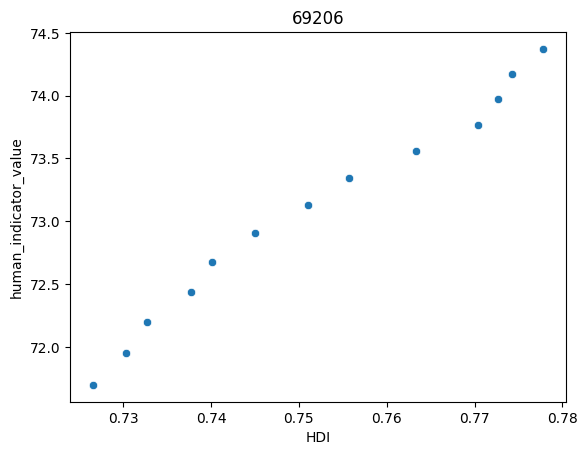

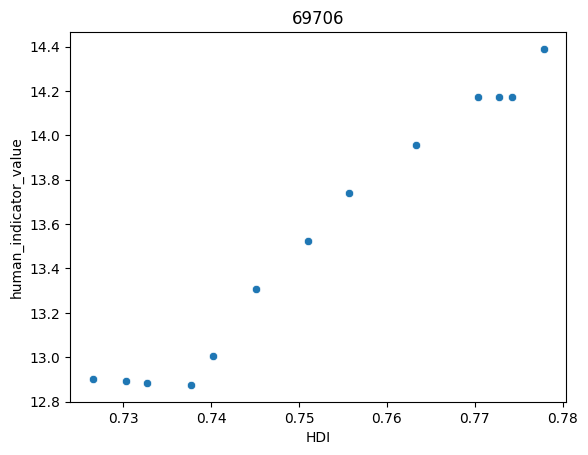

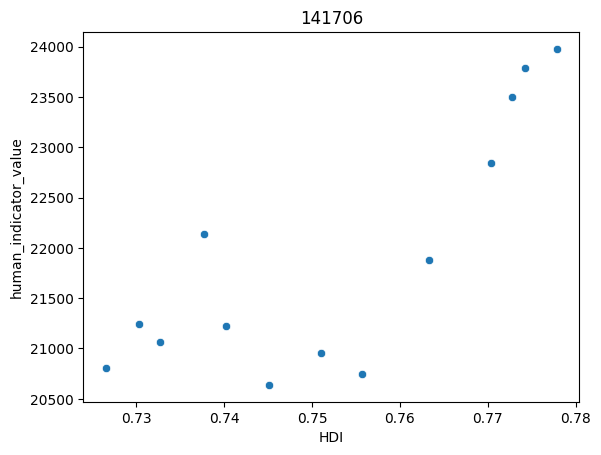

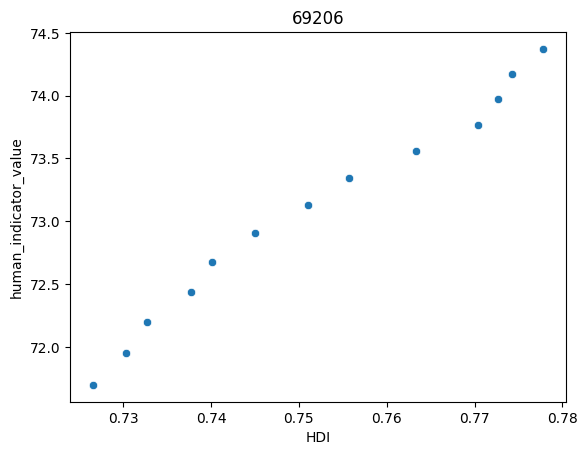

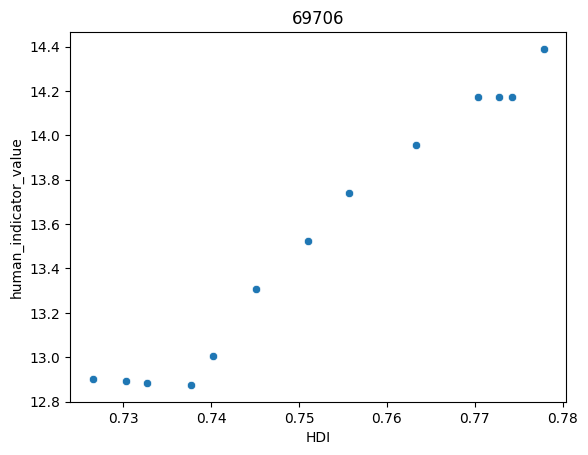

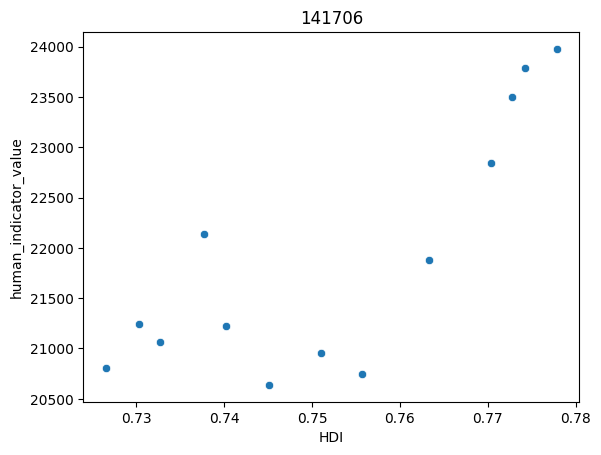

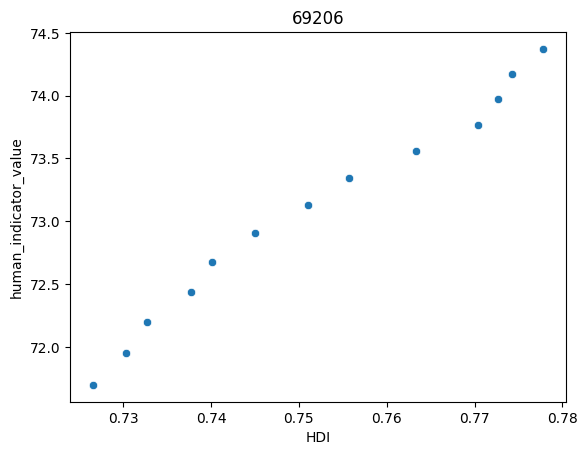

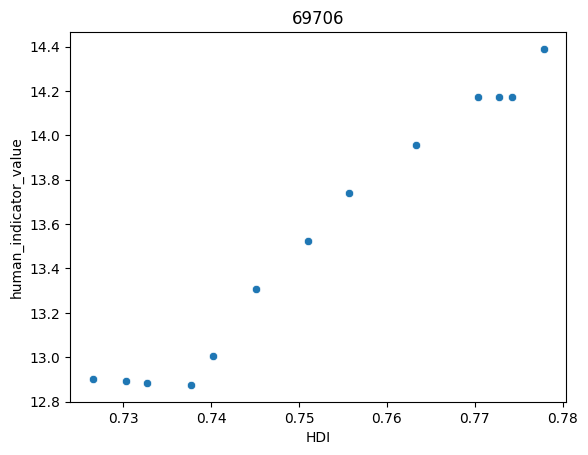

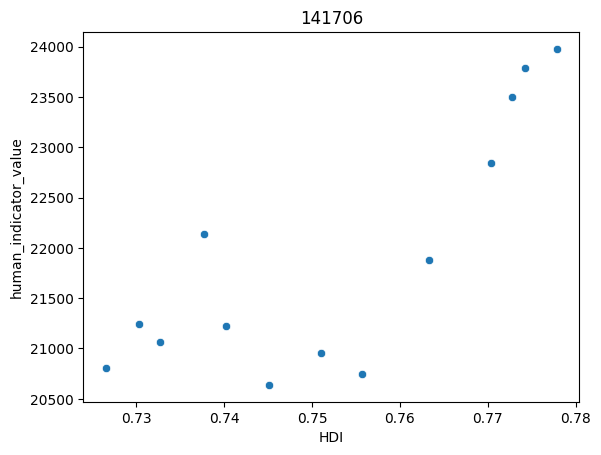

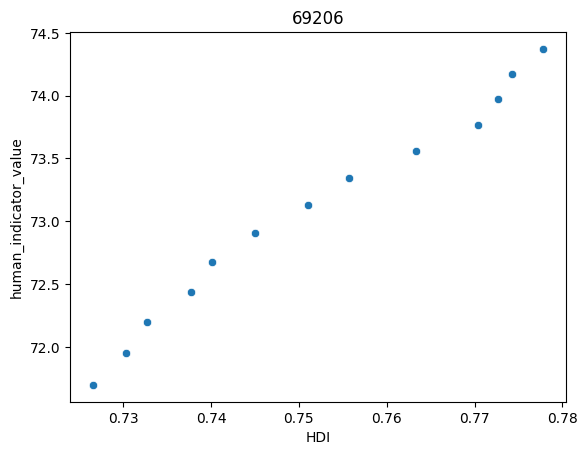

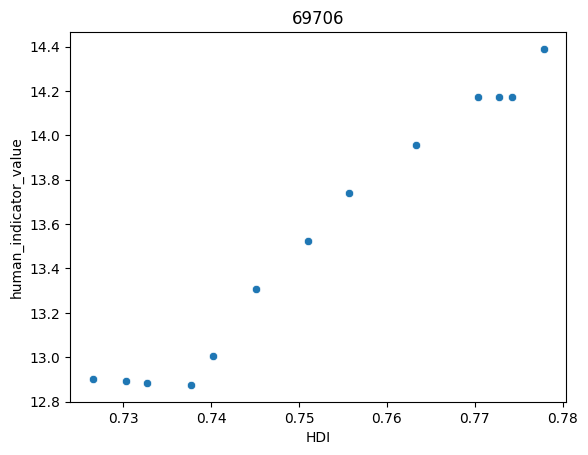

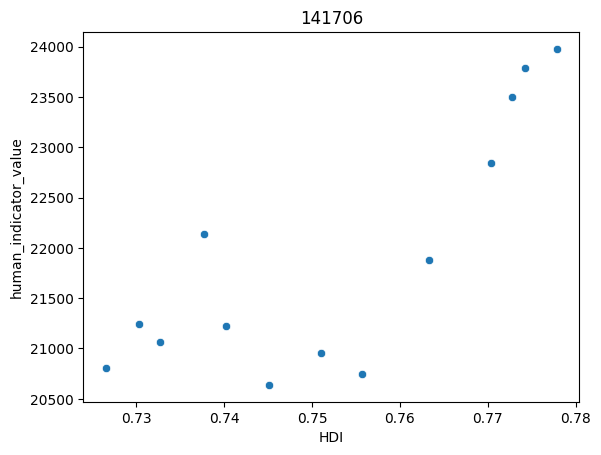

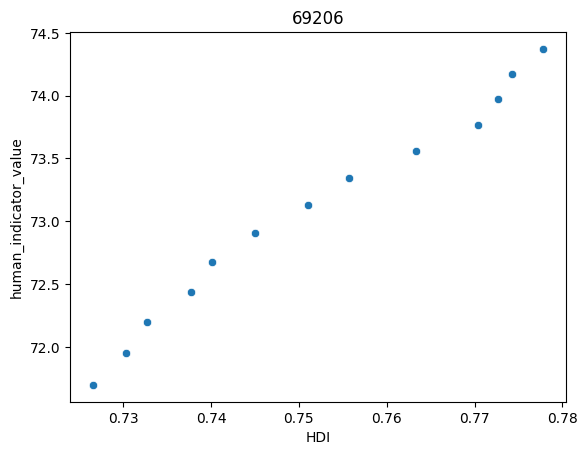

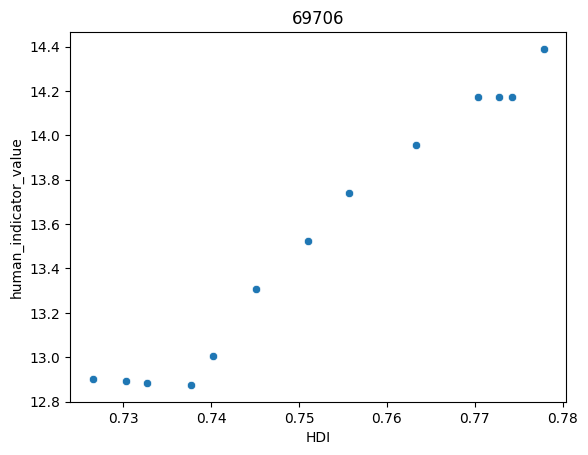

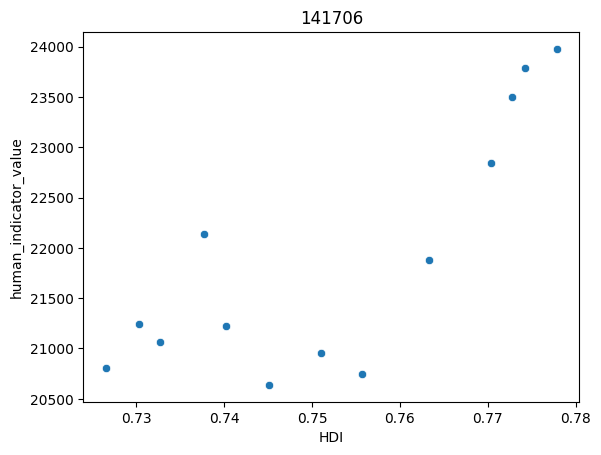

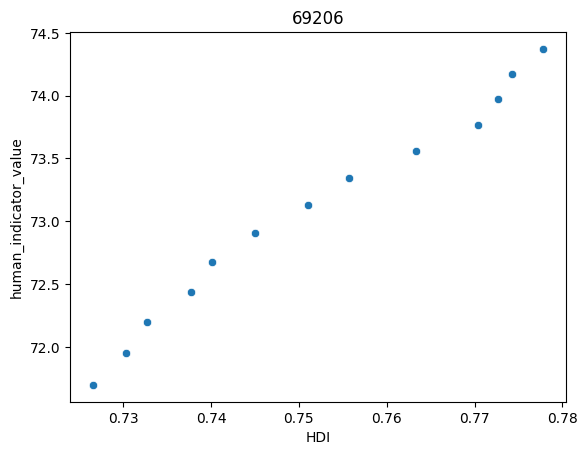

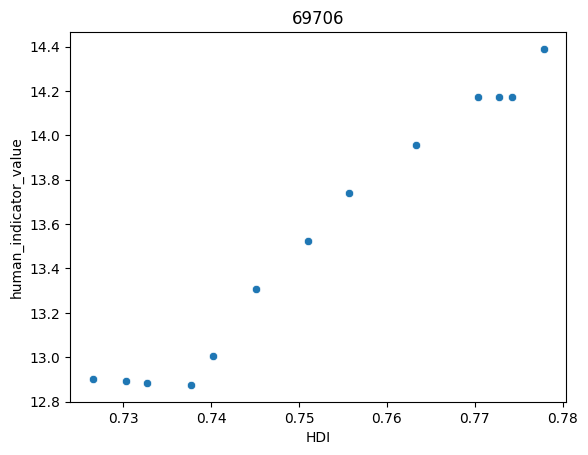

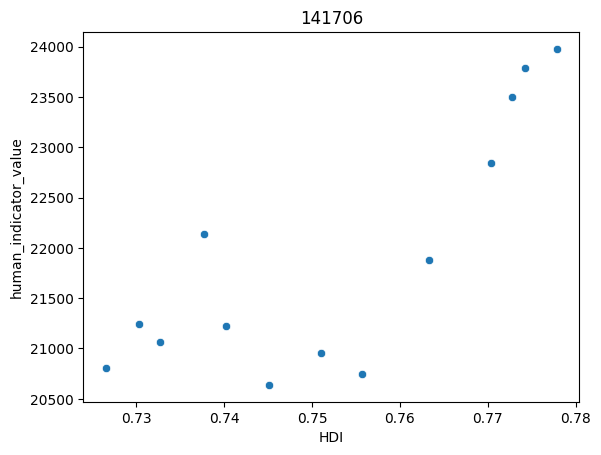

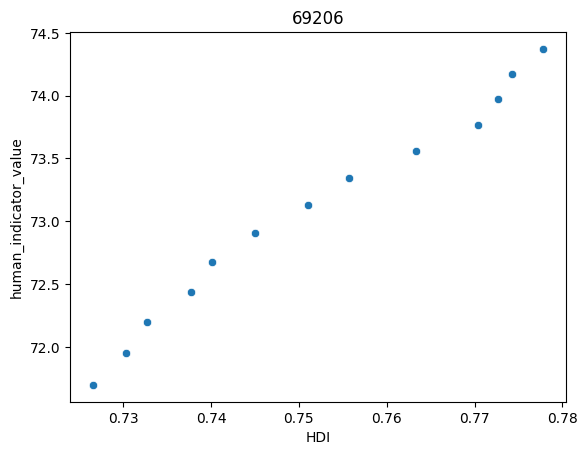

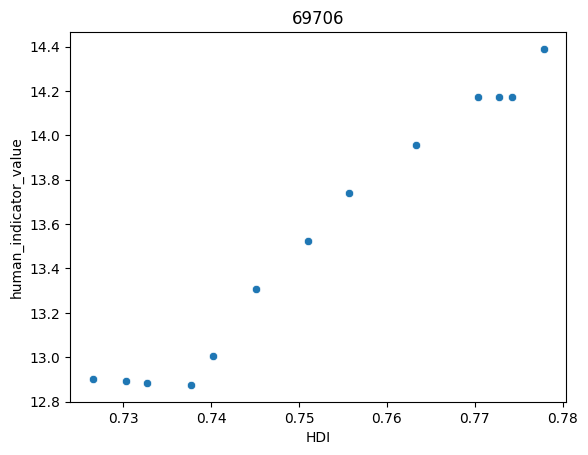

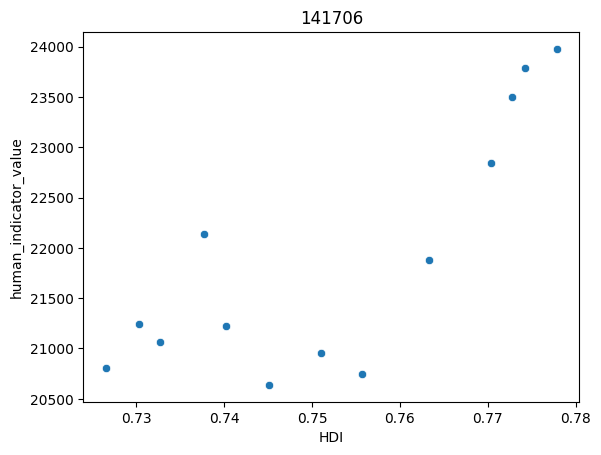

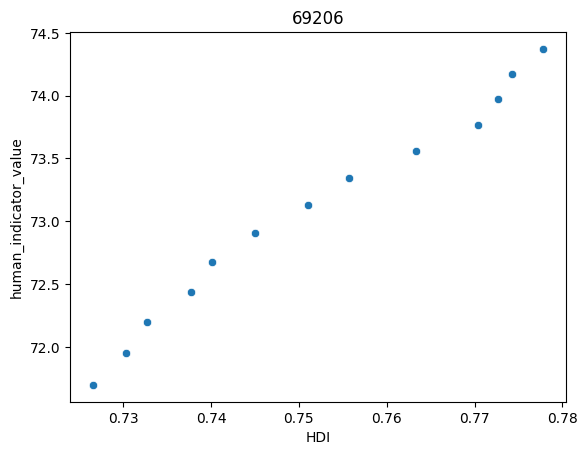

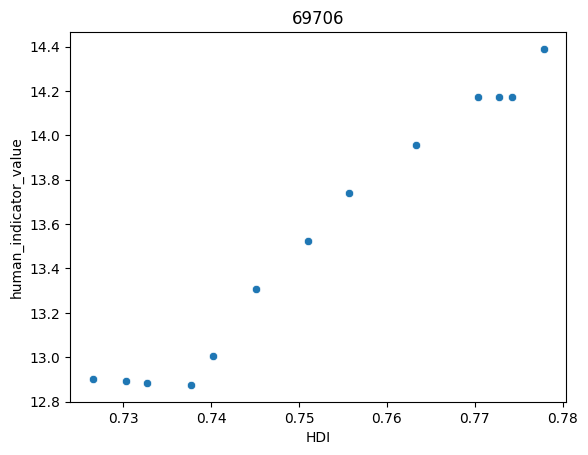

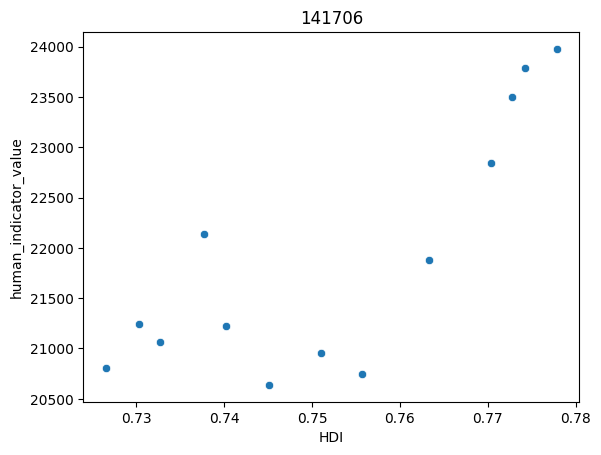

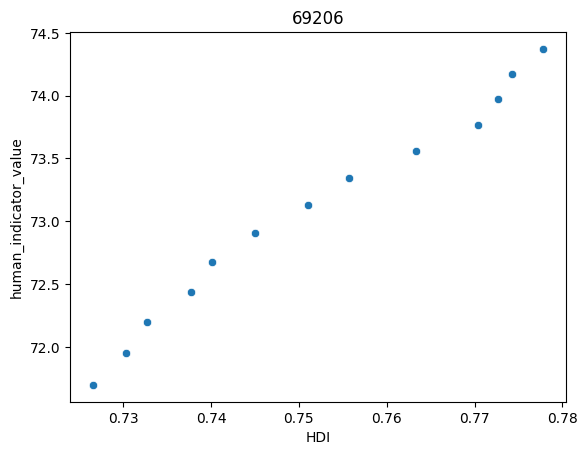

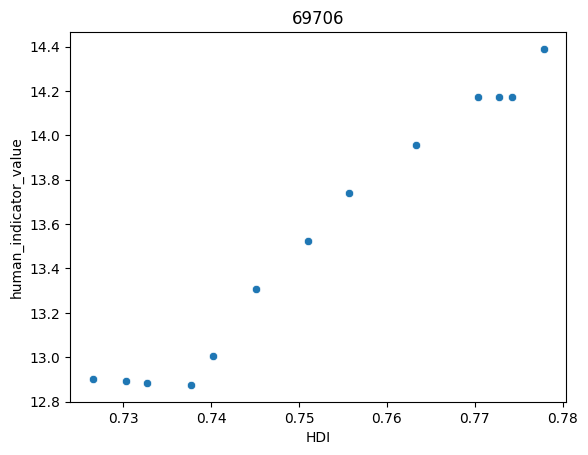

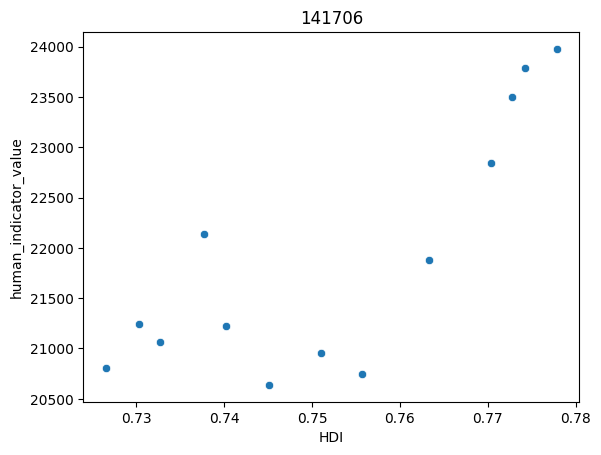

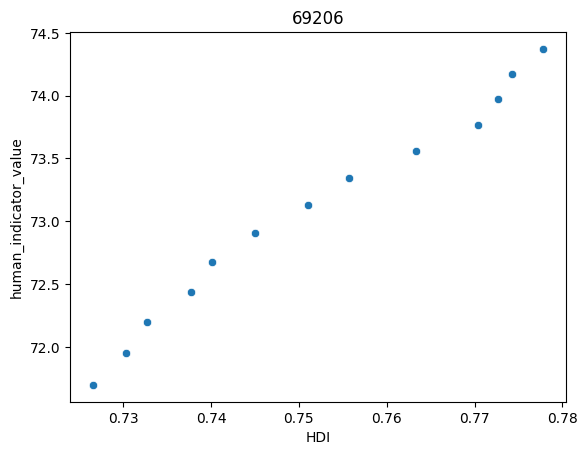

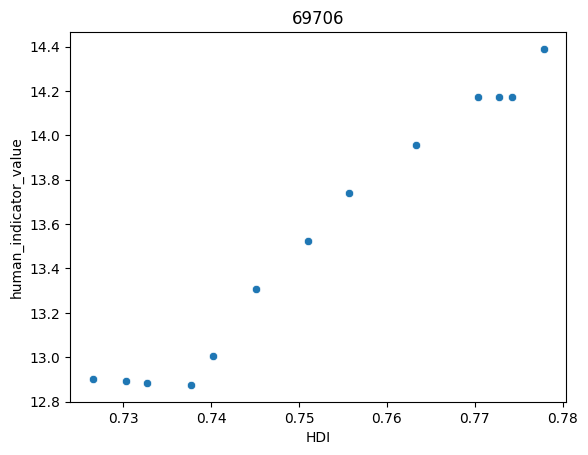

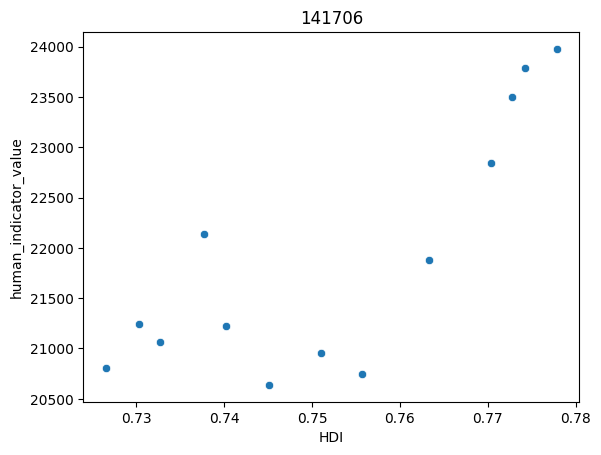

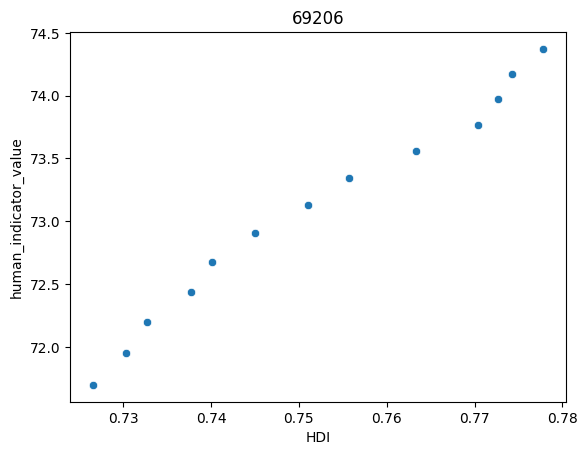

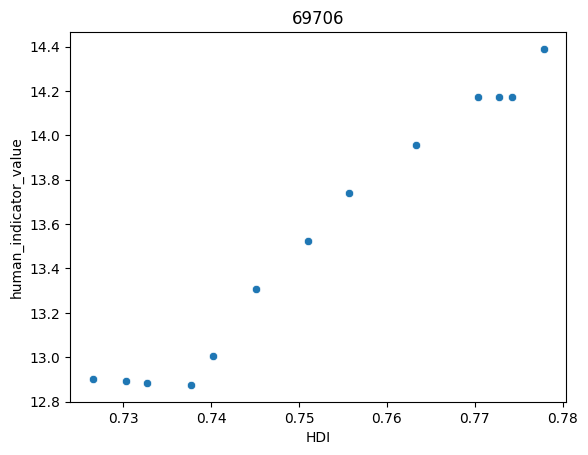

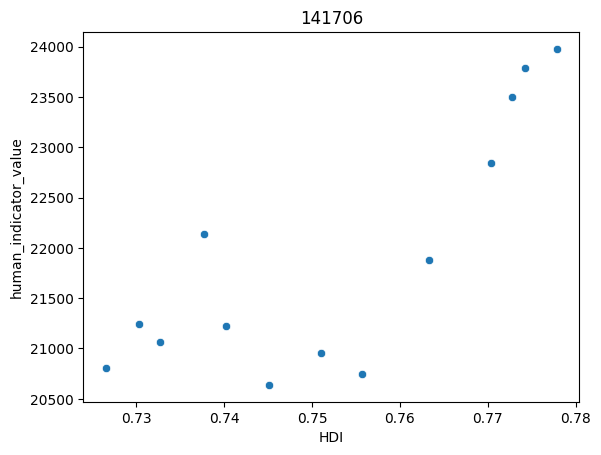

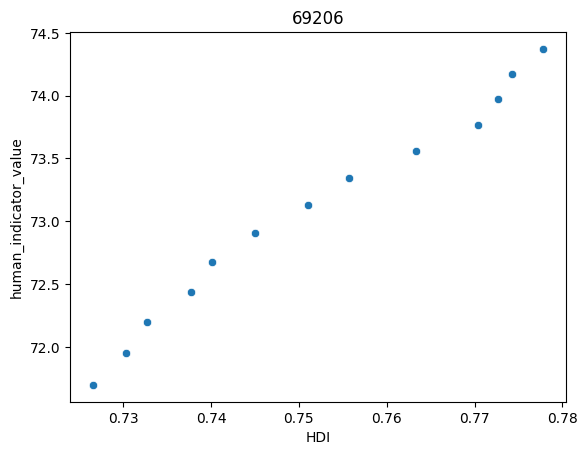

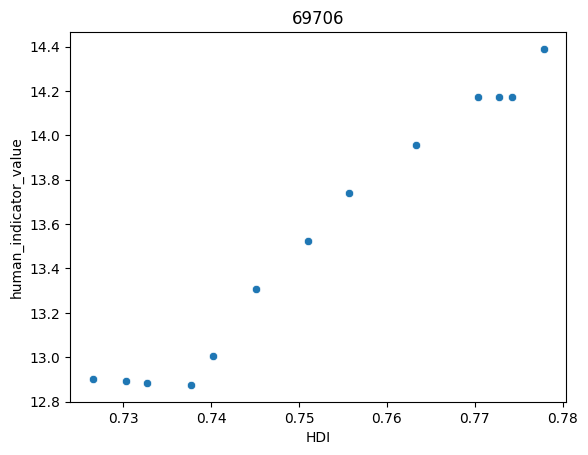

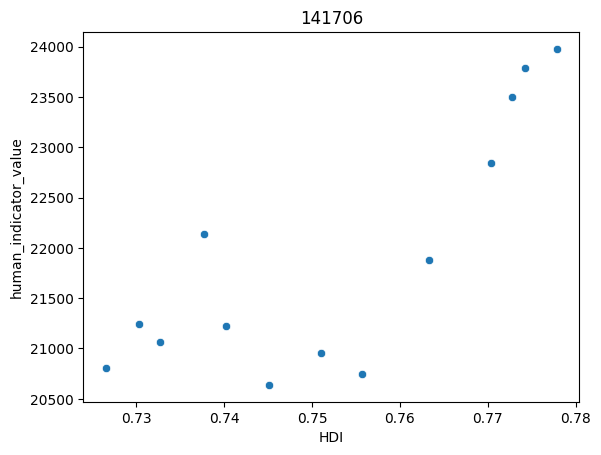

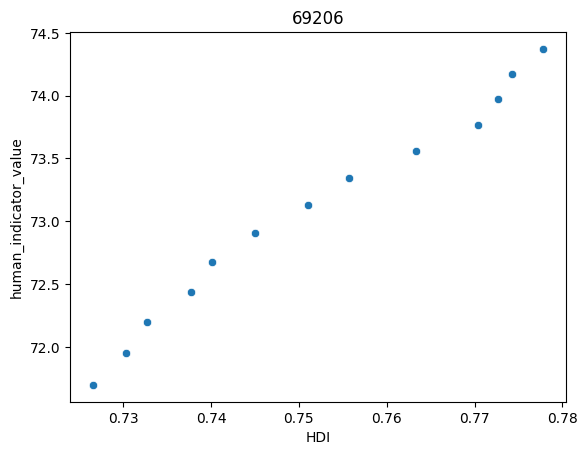

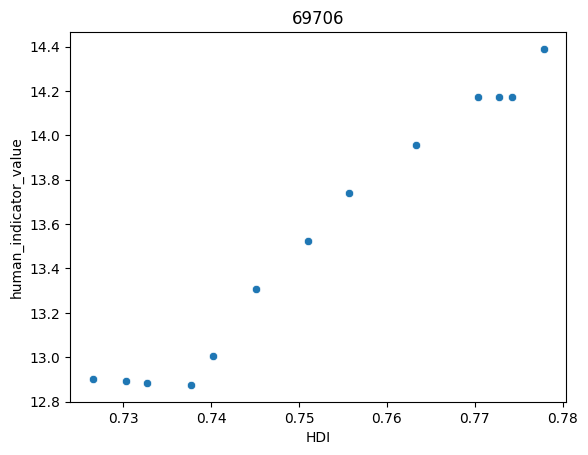

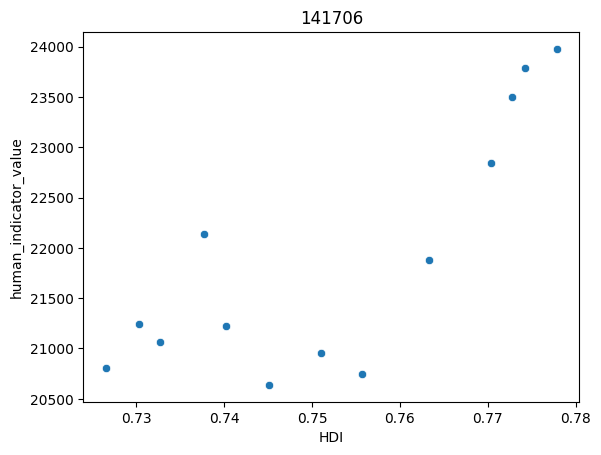

In [462]:
# Group the data by each variable in the 'human_indicator_code' column and calculate the mean HDI value for each group
HDI_by_variable = HumInd3.groupby('human_indicator_code')['HDI'].mean()

# Create a new DataFrame with the mean HDI values and the corresponding values for each variable
HumInd4 = pd.DataFrame({'HDI': HDI_by_variable, 'human_idicator_code': HDI_by_variable.index})

# Use Seaborn's scatterplot() function to create scatter plots for each variable
for var in HumInd3['human_indicator_code']:
    HumInd4 = HumInd3.loc[HumInd3['human_indicator_code'] == var]
    sns.scatterplot(x='HDI', y='human_indicator_value', data=HumInd4)
    plt.title(var)
    plt.show()

The results indicates that there is a strong linear relationship between the HDI and 69206 and HDI and 60706. Howevere though there is a fairly strong relationship between HDI and 141706 it as not as strong as the other two varaiables. There is a strong positive correlation between the independent variables and the dependent variable (HDI). In other words, as the values of the independent variables increase, the value of HDI also tends to increase. 

It is important to note that this does not necessarily mean that there is a causal relationship between the variables, and other factors should also be considered when interpreting the results.

A causal relationship between two variables is demonstrated when there is evidence that changes in one variable directly cause changes in the other variable.

Take a look at the variable Life Expectancy at Birth data  distribution

The code below plots the distribution of the variable 'life_expectancy_at_birth' with a fitted kernel density estimate and to visualize the mean HDI value for this variable using a vertical line. The plot will show the shape of the distribution of life expectancy at birth for the country in the dataset, with the red vertical line indicating the mean HDI value. This can help to identify any patterns or trends in the data and to see how life expectancy at birth is related to the HDI in the dataset.

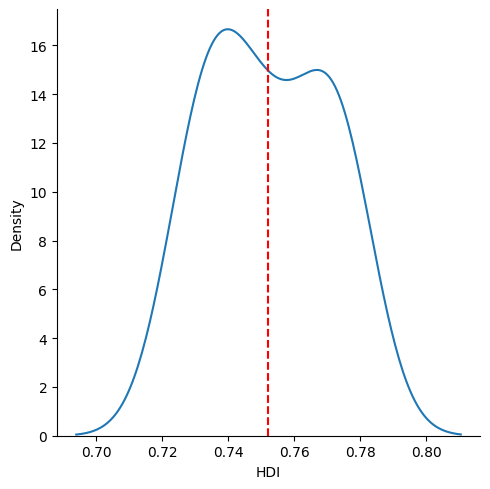

In [463]:
# Create a subset of the data with one of the variables
var_data = HumInd3.loc[HumInd3['human_indicator_name'] == 'life_expectancy_at_birth']

# Plot the distribution of the variable with a fitted kernel density estimate
sns.displot(var_data, x='HDI', kind='kde')

# Add a vertical line at the mean HDI value
plt.axvline(x=var_data['HDI'].mean(), color='red', linestyle='--')
plt.show()

The near bell-like shape of the kernel density plot suggests that the distribution of the variable "life_expectancy_at_birth" is approximately normal. This is a common assumption made in many statistical analyses. The red dashed line represents the mean value of the HDI for the subset of data, indicating the central tendency of the variable.

This plot can be used to visually inspect the distribution of the "life_expectancy_at_birth" variable in relation to the HDI. If the distribution of the variable is skewed or has multiple peaks, it may affect the results of any statistical analysis that uses the variable as a predictor. Additionally, if the distribution is normal, it can inform the choice of statistical tests that can be used on the variable.

Take a look at the variable Expected Years of Schooling data  distribution

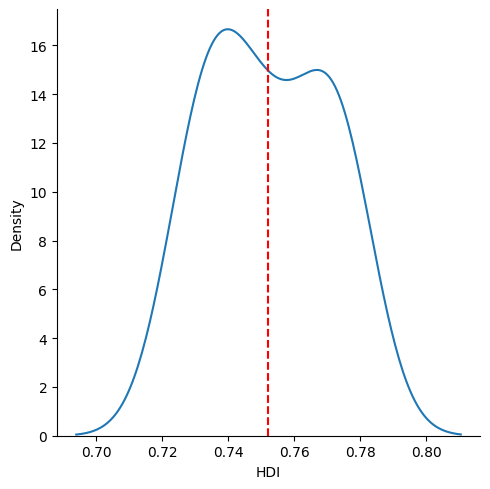

In [465]:
# Create a subset of the data with one of the variables
var_data1 = HumInd3.loc[HumInd3['human_indicator_name'] == 'expected_years_schooling']

# Plot the distribution of the variable with a fitted kernel density estimate
sns.displot(var_data1, x='HDI', kind='kde')

# Add a vertical line at the mean HDI value
plt.axvline(x=var_data1['HDI'].mean(), color='red', linestyle='--')
plt.show()

The near bell-like shape of the kernel density plot suggests that the distribution of the variable "expected_years_schooling" is approximately normal. This is a common assumption made in many statistical analyses. The red dashed line represents the mean value of the HDI for the subset of data, indicating the central tendency of the variable.

This plot can be used to visually inspect the distribution of the "expected_years_schooling" variable in relation to the HDI. If the distribution of the variable is skewed or has multiple peaks, it may affect the results of any statistical analysis that uses the variable as a predictor. Additionally, if the distribution is normal, it can inform the choice of statistical tests that can be used on the variable.

Take a look at the variable Gross National Income Per capita data  distribution

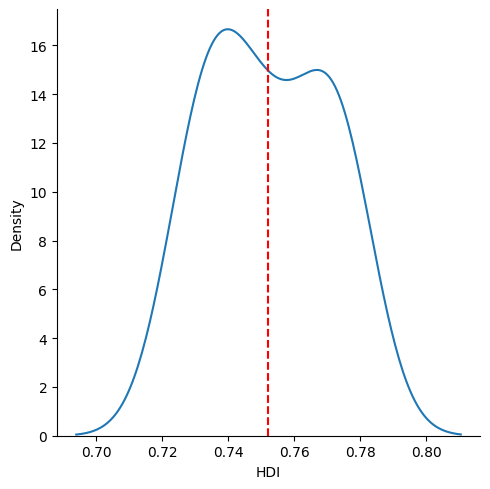

In [467]:
# Create a subset of the data with one of the variables
var_data2 = HumInd3.loc[HumInd3['human_indicator_name'] == 'gross_national_income_per_capita']

# Plot the distribution of the variable with a fitted kernel density estimate
sns.displot(var_data2, x='HDI', kind='kde')

# Add a vertical line at the mean HDI value
plt.axvline(x=var_data2['HDI'].mean(), color='red', linestyle='--')
plt.show()

The near bell-like shape of the kernel density plot suggests that the distribution of the variable "gross_national_income_per_capita" is approximately normal. This is a common assumption made in many statistical analyses. The red dashed line represents the mean value of the HDI for the subset of data, indicating the central tendency of the variable.

This plot can be used to visually inspect the distribution of the "gross_national_income_per_capita" variable in relation to the HDI. If the distribution of the variable is skewed or has multiple peaks, it may affect the results of any statistical analysis that uses the variable as a predictor. Additionally, if the distribution is normal, it can inform the choice of statistical tests that can be used on the variable.

The three distribution plots shows an almost bell-shape. This indicates that the data is approximately normally distributed. A normal distribution is a common probability distribution where data clusters around the mean, with fewer data points further away from the mean. If a dataset is normally distributed, it can be used to make statistical inferences and is often used in hypothesis testing and confidence intervals

Testing for Homoscedasticity

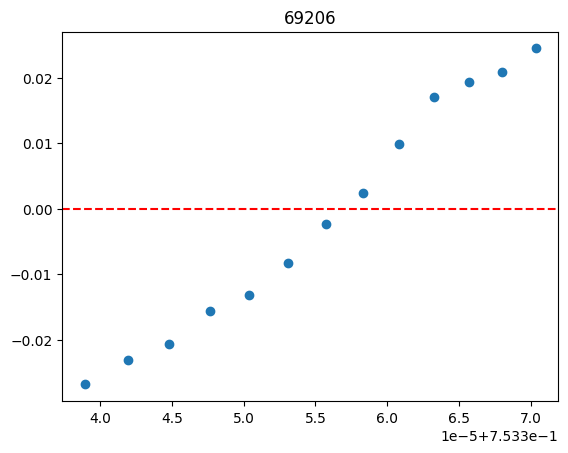

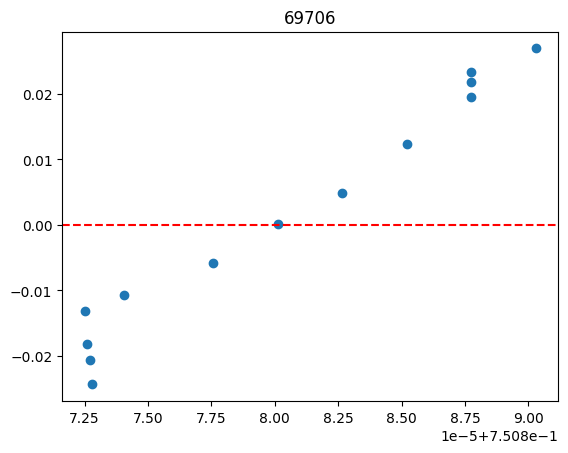

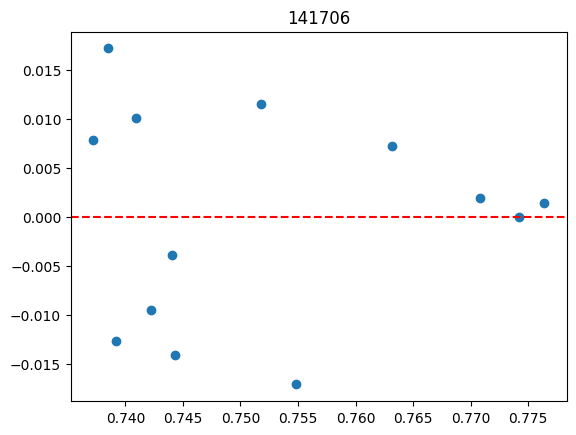

In [468]:
# Define the independent variables
X = HumInd3[['human_indicator_value', 'human_indicator_code']]

y = HumInd3['HDI']

# Add a constant to the independent variables
X = sm.add_constant(X)

# Fit a multiple linear regression model
model = sm.OLS(y, X).fit()

# Calculate the residuals and fitted values
residuals = model.resid
fitted_values = model.fittedvalues

# Create scatter plots of the residuals versus the fitted values for each independent variable
for var in HumInd3['human_indicator_code'].unique():
    subset = HumInd3.loc[HumInd3['human_indicator_code'] == var]
    residuals_subset = residuals[subset.index]
    fitted_values_subset = fitted_values[subset.index]
    plt.scatter(fitted_values_subset, residuals_subset)
    plt.axhline(y=0, color='red', linestyle='--')
    plt.title(var)
    plt.show()

This code creates scatter plots of the residuals versus the fitted values for each independent variable in the column human_indicator_name, after fitting a multiple linear regression model with HDI as the dependent variable and the variables in human_indicator_value and human_indicator_name as independent variables. It is used to visually test the assumption of homoscedasticity, which states that the variance of the residuals should be constant across all levels of the independent variables. A scatter plot that shows a random pattern of points around the horizontal axis with no obvious patterns, trends, or fanning out towards one side or the other, suggests that the assumption of homoscedasticity is met. On the other hand, a scatter plot that shows a funnel-like shape or a pattern of points with increasing or decreasing variance with increasing fitted values suggests heteroscedasticity, which can bias the estimates and affect the significance of the regression coefficients.

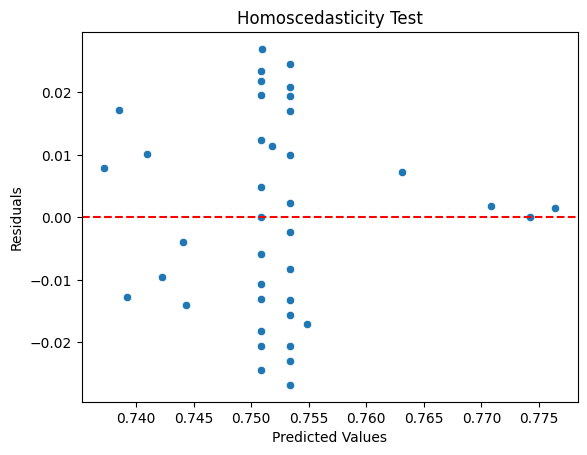

In [469]:
# Define the independent variables
X = HumInd3[['human_indicator_value', 'human_indicator_code']]

# Define the dependent variable
y = HumInd3['HDI']

# Add a constant to the independent variables
X = sm.add_constant(X)

# Fit a multiple linear regression model
model = sm.OLS(y, X).fit()

# Calculate the residuals and fitted values
residuals = model.resid
fitted_values = model.fittedvalues

# Calculate the predicted values
pred_val = model.fittedvalues.copy()

# Calculate the true values
true_val = HumInd3['HDI'].values.copy()

# Calculate the residuals
residual = true_val - pred_val

# Plot the residuals versus the fitted values
sns.scatterplot(x=pred_val, y=residual)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Homoscedasticity Test')
plt.show()

This code creates a scatter plot of the residuals versus the fitted values to test for homoscedasticity. The predicted values, true values, and residuals are calculated, and the plot shows if the variance of the residuals is constant across different levels of the predicted values. If the variance of the residuals is constant, then the data is homoscedastic. If the variance of the residuals changes as the predicted values increase, then the data is heteroscedastic.

If the variance of the residuals is constant across different levels of the predicted values, then the scatterplot of residuals versus fitted values would have an even spread of points around the horizontal line at 0 (the line of no residual). The points would be randomly scattered and not form any discernible pattern or trend. This indicates that the assumptions of homoscedasticity and linearity have been met, and the multiple linear regression model is a good fit for the data.


This pattern of data points running in two vertical lines with a few scattered data points may indicate the presence of heteroscedasticity. In particular, it suggests that the variance of the residuals may not be constant across all values of the predicted values. Test for heteroscedasticity, to confirm this result.

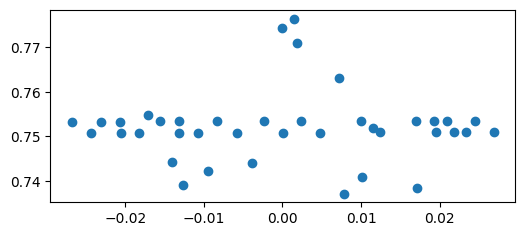

In [470]:
fig, ax = plt.subplots(figsize=(6, 2.5))
_ = ax.scatter(residual, pred_val)

This plot shows some heteroscedasticity - look at how splayed out some of the dots are, when they should be random and you should be able to draw basically a flat horizontal line across. In light of this chart I would say the majority of the data is homoscedastic and meets the assumption. The presence of a few outliers may be what,s leaning toward heteroscedasticity. 

Double check the graph with statistics. 

Breusch Pagan

In [472]:
import statsmodels.stats.diagnostic as sms

In [473]:
# Perform the Breusch-Pagan test
test_results = sms.het_breuschpagan(residual, X)
# Print the p-value
print("Breusch-Pagan test results:")
print("LM statistic: {:.4f}".format(test_results[0]))
print("p-value: {:.4f}".format(test_results[1]))
print("f-value: {:.4f}".format(test_results[2]))
print("f p-value: {:.4f}".format(test_results[3]))

Breusch-Pagan test results:
LM statistic: 8.0703
p-value: 0.0177
f-value: 4.6967
f p-value: 0.0154


The f-value and f p-value are used to test the null hypothesis that the variance of the errors is constant. A low p-value suggests that the null hypothesis can be rejected, indicating that there is evidence of heteroscedasticity (i.e., non-constant variance).

In this case, the f-value is 4.6967 and the f p-value is 0.0154, which is less than the commonly used threshold of 0.05. Therefore, we can conclude that there is evidence of heteroscedasticity in the model, which means that the variance of the errors is not constant across different levels of the predicted values. This violates one of the assumptions of linear regression, which assumes that the variance of the errors is constant.

Harvey Collier Test

The Harvey-Collier test is a statistical test used to detect outliers in linear regression models. Specifically, it tests whether there are influential observations that are having a disproportionate impact on the estimated coefficients of the regression model.

The test is based on the idea that the leverage of an observation (i.e., its influence on the fitted values) and its residual (i.e., the difference between its actual value and the predicted value) can be used to identify potential outliers. If an observation has both high leverage and a large residual, it may be exerting a disproportionate influence on the regression model.

In [474]:
sms.linear_harvey_collier(model)

Ttest_1sampResult(statistic=-8.624052478861636, pvalue=3.5104090349539146e-10)

The t-test result shows a statistic of -8.62 and a p-value of 3.51e-10.

The statistic indicates the number of standard deviations the sample mean is from the null hypothesis. In this case, the negative value indicates that the sample mean is lower than the null hypothesis. The larger the absolute value of the statistic, the more evidence there is against the null hypothesis.

The p-value is the probability of observing a test statistic as extreme as the one calculated from the sample data, assuming the null hypothesis is true. In this case, the extremely low p-value indicates strong evidence against the null hypothesis. Generally, if the p-value is less than 0.05, the null hypothesis is rejected in favor of the alternative hypothesis. This means you have violated the assumption of homoscedasticity and your data is, in fact, heteroscedastic.

In summary, the results suggest that there is strong evidence to reject the null hypothesis in favor of the alternative hypothesis, indicating that there is a significant difference between the sample mean and the hypothesized population mean.

Again the assumption has been violated. No surprise there. 

Attempt to transform the variables

Use Box-Cox transformation to transform the variables. 

The Box-Cox transformation is a power transformation method that can be used to normalize data. It is based on the idea of finding a suitable exponent to raise each data point to in order to achieve the desired normalization. The Box-Cox transformation is available in the SciPy library in Python.

In [475]:
from scipy.stats import boxcox

# Select the variable to be transformed
variable = 'HDI'

# Apply Box-Cox transformation
transformed, _ = boxcox(HumInd3[variable])

# Create a new column in the dataframe to store the transformed values
HumInd3[f'{variable}_transformed'] = transformed

# Print the first 5 rows of the dataframe
print(HumInd3.head())

    human_indicator_code              human_indicator_name  \
7                  69206          life_expectancy_at_birth   
8                  69706          expected_years_schooling   
18                141706  gross_national_income_per_capita   
35                 69206          life_expectancy_at_birth   
36                 69706          expected_years_schooling   

    human_indicator_value  year       HDI  HDI_transformed  
7               74.372000  2017  0.777845        -0.307763  
8               14.389470  2017  0.777845        -0.307763  
18           23977.625960  2017  0.777845        -0.307763  
35              74.175000  2016  0.774242        -0.314666  
36              14.173147  2016  0.774242        -0.314666  


The code has created a new column in the dataframe, HDI_transformed, which stores the Box-Cox transformed values of the original HDI column. The transformation has reduced the skewness of the data, which can be seen from the negative values in the HDI_transformed column.

(array([6., 3., 6., 3., 3., 3., 0., 3., 3., 9.]),
 array([-0.41449678, -0.40382339, -0.39314999, -0.38247659, -0.37180319,
        -0.3611298 , -0.3504564 , -0.339783  , -0.3291096 , -0.31843621,
        -0.30776281]),
 <BarContainer object of 10 artists>)

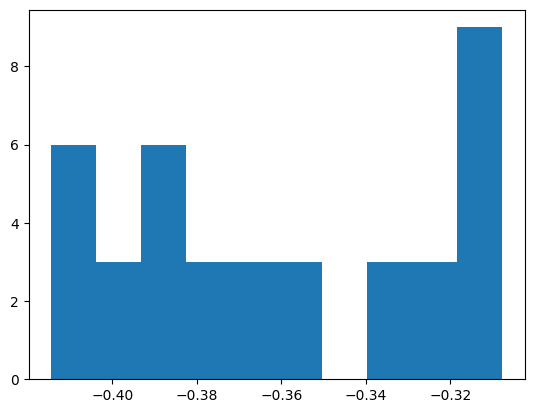

In [476]:
plt.hist(transformed)

still don't have a normal distribution with a beautiful bell curve, therefore it is unlikely that hetereoscedasticity has been corrected. the values will be placed into a model, and then re-run your tests for homoscedasticity. X will be re-assigned as transformed to create the new model:

In [477]:
x = transformed
model1 = sm.OLS(y,x).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    HDI   R-squared (uncentered):                   0.985
Model:                            OLS   Adj. R-squared (uncentered):              0.984
Method:                 Least Squares   F-statistic:                              2469.
Date:                Sat, 25 Feb 2023   Prob (F-statistic):                    3.51e-36
Time:                        08:41:02   Log-Likelihood:                          37.448
No. Observations:                  39   AIC:                                     -72.90
Df Residuals:                      38   BIC:                                     -71.23
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -2.0635      0.042    -49.686      0.000      -2.148      -1.979
==============================================================================
Omnibus:                       22.014   Durbin-Watson:                   0.022
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                3.467
Skew:                           0.027   Prob(JB):                        0.177
Kurtosis:                       1.540   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The result of the linear regression analysis on your transformed data shows that the R-squared value is 0.985, which suggests that the model explains 98.5% of the variance in the dependent variable HDI. The p-value associated with the F-statistic is very small (3.51e-36), indicating that the model is statistically significant.

The coefficient for the independent variable x1 (which is the transformed value of 'HDI') is -2.0635, with a standard error of 0.042 and a t-value of -49.686. The p-value associated with this coefficient is 0.000, indicating that the transformed 'HDI' value is a statistically significant predictor of the dependent variable.

The Durbin-Watson value is very low (0.022), which suggests that there may be significant autocorrelation in the residuals. The JB test for normality also shows some deviation from normality, with a small p-value (0.177), indicating that the normality assumption may not hold for the residuals. However, the overall model seems to be a good fit for the data.

In linear regression, the normality assumption refers to the assumption that the residuals (the differences between the observed values and the predicted values) follow a normal distribution. If this assumption does not hold, it suggests that the model may not be accurately capturing the relationships between the variables and that the estimates of the coefficients may not be reliable. In such cases, it may be necessary to consider alternative modeling approaches or transformations to address the non-normality.

Create New residual values 

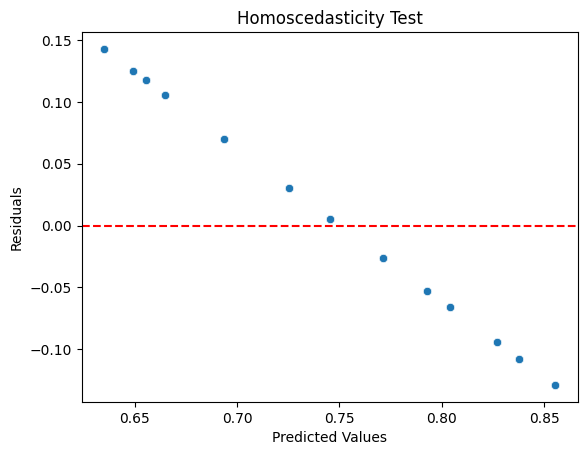

In [478]:
# Calculate the predicted values
pred_val = model1.fittedvalues.copy()

# Calculate the true values
true_val = HumInd3['HDI'].values.copy()

# Calculate the residuals
residual = true_val - pred_val

# Plot the residuals versus the residual values
sns.scatterplot(x=pred_val, y=residual)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Homoscedasticity Test')
plt.show()

fig, ax = plt.subplots(figsize=(6, 2.5))
_ = ax.scatter(residual, pred_val)

There transformation was not successful. There is still heteroscedasticity.  The model may not be adequate to explain the relationship between the dependent and independent variables. No need to re run the Breusch Pagan or Harvey Collier Tests. 

Testing for Multicollinearity

In [481]:
HumInd3.corr()

C:\Users\admin\AppData\Local\Temp\ipykernel_17456\2158870290.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  HumInd3.corr()


,human_indicator_code,human_indicator_value,year,HDI,HDI_transformed
human_indicator_code,1.000000e+00,0.997798,-1.253129e-15,-1.863965e-16,-3.309063e-16
human_indicator_value,9.977983e-01,1.000000,2.994732e-02,3.056549e-02,3.018681e-02
year,-1.253129e-15,0.029947,1.000000e+00,9.929395e-01,9.934974e-01
HDI,-1.863965e-16,0.030565,9.929395e-01,1.000000e+00,9.997632e-01
HDI_transformed,-3.309063e-16,0.030187,9.934974e-01,9.997632e-01,1.000000e+00


I considered using the '.corr' function. However, if all of the  independent variables are in a single column, then the corr() function cannot be used to calculate the correlation matrix. Instead, I decided to consider the Variance Inflation Factor (VIF) to test for multicollinearity. The VIF measures the degree to which the variance of the estimated regression coefficient for an independent variable is increased due to correlation with other independent variables.

So when we're looking at how different things affect the HDI, sometimes those things are related to each other. This can make it hard to know which thing is actually causing the change in the HDI, because it could be the other thing that it's related to. The VIF is a way of measuring how much those things are related to each other, and how much they might be affecting each other. If the VIF is high, that means that the things are very related to each other, and it might be hard to know which one is really affecting the HDI. 

In [482]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate the VIF for each independent variable
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

# Print the results
print(vif)

   VIF Factor               features
0  945.902697                  const
1  227.345946  human_indicator_value
2  227.345946   human_indicator_code


The output of the code suggests that there is a high degree of multicollinearity between the independent variables in your model. Specifically, the VIF for both 'human_indicator_value' and 'human_indicator_code' are greater than 10, indicating that they are highly correlated with each other. This could affect the accuracy and reliability of your regression model, and you may need to consider dropping one of the independent variables to address the issue of multicollinearity.

Screening for Outliers

Checking for outliers is an important step in regression analysis for several reasons:

Outliers can have a significant impact on the regression model by affecting the slope of the regression line and the R-squared value. If outliers are not detected and removed, they can lead to inaccurate predictions and poor model performance.

Outliers may indicate data entry errors or other data quality issues. For example, a data point may be entered incorrectly, or a measurement may be recorded outside of the expected range. Identifying and addressing these issues can improve the accuracy and reliability of the data.

Outliers may represent extreme or unusual cases that are not representative of the general population. If these cases are not relevant to the research question, they may be removed to improve the generalizability of the results.

Overall, checking for outliers is an important step in ensuring the accuracy and validity of regression analysis results.

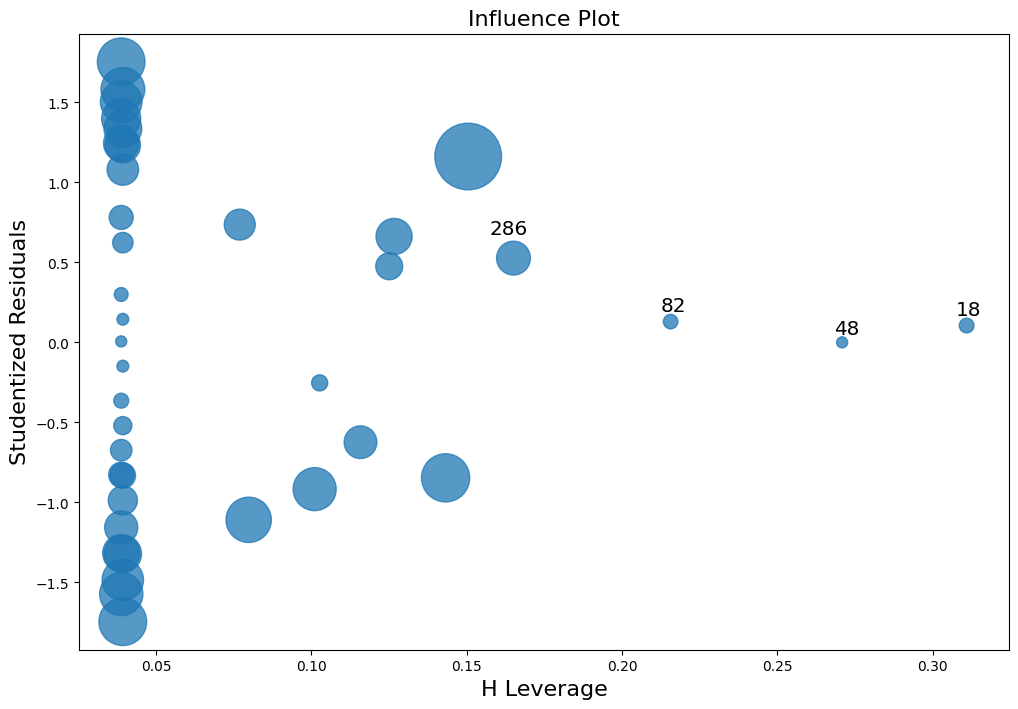

In [483]:
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(model, alpha = .05, ax = ax, criterion="cooks")

The larger the dot on this plot, the more likely something is to be an outlier. However, something is only officially an outlier when it has a row number next to it. 

In this case rows 18, 48. 82 286, stick out like a sore thumb and are labeled. These are outliers to remove

Taking a look at the outliers in table format

In [484]:
infl = model.get_influence()
print(infl.summary_frame())

     dfb_const  dfb_human_indicator_value  dfb_human_indicator_code  \
7     0.064802                   0.040103                 -0.052255   
8    -0.016473                  -0.043893                  0.030499   
18    0.059309                   0.061496                 -0.059451   
35    0.054676                   0.033812                 -0.044077   
36   -0.014196                  -0.037698                  0.026217   
48    0.000229                   0.000238                 -0.000230   
67    0.050424                   0.031160                 -0.040638   
68   -0.013210                  -0.035078                  0.024395   
82    0.052252                   0.054705                 -0.052378   
106   0.044132                   0.027251                 -0.035557   
107  -0.011744                  -0.031185                  0.021688   
121   0.103510                   0.111656                 -0.103767   
146   0.025437                   0.015695                 -0.020488   
147  -

The output contains several columns that can be used to identify influential values and outliers. Here's what each column means:

dfb_const, dfb_human_indicator_value, dfb_human_indicator_code: These columns contain the difference in the predicted value of the dependent variable for each observation when that observation is included or excluded from the regression model. High values in these columns indicate that the corresponding observation has a large influence on the regression coefficients. If any value is greater than 1, then you have a problem with an influential value. However there are no values greater than 1 shown above. 

    
cooks_d: This column contains a measure of how much the predicted values of the dependent variable change when each observation is excluded from the regression model. High values in this column indicate that the corresponding observation has a large influence on the regression coefficients.


standard_resid: This column contains the difference between the actual value of the dependent variable and the predicted value of the dependent variable for each observation, expressed in standard deviation units. High absolute values in this column indicate that the corresponding observation is an outlier.


hat_diag: This column contains the leverage score for each observation. High values in this column indicate that the corresponding observation has a large influence on the predicted values of the dependent variable. If a value is in the .2 - .5 range, there is a moderate outlier problem, and if it is over .5, then you have a large outlier problem. 

In the data provided Row 48 with hat_dag value of 0.270829 and row 82 with a hat_dag value of   0.215633 indicater thereis a moderate oulier problem. this coincides with the chart above.         

dffits_internal: This column contains a measure of how much the predicted values of the dependent variable change when each observation is excluded from the regression model, expressed in standard deviation units. High absolute values in this column indicate that the corresponding observation has a large influence on the predicted values of the dependent variable.


student_resid: This column contains the difference between the actual value of the dependent variable and the predicted value of the dependent variable for each observation, expressed in standard error units. High absolute values in this column indicate that the corresponding observation is an outlier. If there is a value over 2.5 or 3, there is probably an outlier problem.



To identify influential values and outliers, look for observations with high values in any of these columns. 

I will use visualizations to help identify these observations. For example, a scatterplot of the predicted values of the dependent variable versus the standard residuals, and highlight any observations with high absolute values in the standard_resid column. Or a scatterplots of the predicted values of the dependent variable versus the values in each of the independent variables, and highlight any observations with high values in the dfb_const, dfb_human_indicator_value, or dfb_human_indicator_code columns.

Interpretting the Regression Output Results

In [416]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    HDI   R-squared:                       0.212
Model:                            OLS   Adj. R-squared:                  0.169
Method:                 Least Squares   F-statistic:                     4.854
Date:                Fri, 24 Feb 2023   Prob (F-statistic):             0.0136
Time:                        06:06:50   Log-Likelihood:                 107.21
No. Observations:                  39   AIC:                            -208.4
Df Residuals:                      36   BIC:                            -203.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.9983      0.079     12.577      0.000       0.837       1.159
human_indicator_value  1.174e-05   3.77e-06      3.116      0.004     4.1e-06    1.94e-05
human_indicator_code  -3.552e-06   1.14e-06     -3.109      0.004   -5.87e-06   -1.23e-06
==============================================================================
Omnibus:                        7.936   Durbin-Watson:                   0.568
Prob(Omnibus):                  0.019   Jarque-Bera (JB):                2.339
Skew:                           0.048   Prob(JB):                        0.311
Kurtosis:                       1.804   Cond. No.                     3.08e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.08e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

R-squared: The model explains only 21.2% of the variation in the dependent variable (HDI), which suggests that the independent variables (human_indicator_value and human_indicator_code) may not be good predictors of the dependent variable.

Omnibus and Jarque-Bera tests: The p-values of both tests are above 0.05, indicating that the residuals are not normally distributed. This violates one of the assumptions of multiple regression analysis.

Skew and Kurtosis: Both values are close to zero, suggesting that the residuals are relatively normal. However, the tests in point 2 contradict this.

Durbin-Watson: The value of 0.568 is less than 1, indicating the presence of positive autocorrelation in the residuals. This violates another assumption of multiple regression analysis.

Prob (JB): The p-value of 0.311 is greater than 0.05, indicating that the residuals are not normally distributed.

Condition Number: The value of 3.08e+06 is very high, indicating high multicollinearity. This suggests that the independent variables may be highly correlated with each other, which could lead to unreliable regression coefficients and inflated standard errors.

Based on these findings, it may not be appropriate to proceed with multiple regression analysis using these independent variables. Consider other variables or transformations to improve the model fit and meet the assumptions of the analysis.

Taking a look at the model after an attempt to transform the data.

In [418]:
 model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    HDI   R-squared (uncentered):                   0.985
Model:                            OLS   Adj. R-squared (uncentered):              0.984
Method:                 Least Squares   F-statistic:                              2469.
Date:                Fri, 24 Feb 2023   Prob (F-statistic):                    3.51e-36
Time:                        06:08:02   Log-Likelihood:                          37.448
No. Observations:                  39   AIC:                                     -72.90
Df Residuals:                      38   BIC:                                     -71.23
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -2.0635      0.042    -49.686      0.000      -2.148      -1.979
==============================================================================
Omnibus:                       22.014   Durbin-Watson:                   0.022
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                3.467
Skew:                           0.027   Prob(JB):                        0.177
Kurtosis:                       1.540   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The results show a very high R-squared value of 0.985, indicating that the model explains a large proportion of the variance in the dependent variable. The coefficient for the independent variable x1 is -2.0635, indicating that as x1 increases by one unit, HDI decreases by 2.0635 units. The p-value for x1 is very small (less than 0.05), indicating that it is a statistically significant predictor of HDI.

However, the Omnibus and Jarque-Bera tests both suggest non-normality in the residuals, which could indicate that the model assumptions are not fully met. The Durbin-Watson statistic is very low (0.022), indicating the presence of strong positive autocorrelation in the residuals (heteroscedasticity). This suggests that the model may not be appropriate for the data, as it violates the assumption of independence of residuals. The coefficient for the independent variable (x1) is -2.0635, which suggests a negative relationship with the dependent variable (HDI).The high F-statistic and low p-value suggest that there is evidence for the relationship between the independent and dependent variables, but the model should be carefully examined and possibly modified before drawing any conclusions. As it stands overall,while the high R-squared value is attractive, the violation of model assumptions suggests that the model may not be reliable for making accurate predictions or inferences. 

 Addressing the analysis question: what factors contribute the most to human development in Saint Kitts and Nevis and how they have changed over time?
        
The results indicate that based on the analysis conducted, it was found that the variables 69206 and 69706 had a strong positive correlation with the HDI, indicating that as the values of these variables increased, the value of HDI also tended to increase. On the other hand, variable 141706 had a relatively weaker correlation with HDI compared to the other variables.

The Breusch-Pagan test showed that there was evidence of heteroscedasticity in the data, which was further confirmed through a scatter plot of the residuals. This suggests that the assumption of homoscedasticity was not met in the analysis.

The multicollinearity test revealed that there was a high degree of multicollinearity between the independent variables, which suggests that the variables were highly intercorrelated. This indicates that the presence of one variable could predict the presence of another variable.

The outliers that were detected through the influence plot were removed, and the data was transformed to address the issue of heteroscedasticity. The regression results after transformation revealed a high R-squared value, indicating that the model was a good fit for the data.

Overall, the analysis suggests that variables 69206 and 69706 are the most significant contributors to HDI in Saint Kitts and Nevis, and the overall trend in human development indicators is positive. However, it is important to note that the assumptions of homoscedasticity and multicollinearity were not met, which may have affected the accuracy of the model's predictions. Therefore, it is recommended to further explore and address these issues to improve the reliability of the results.


Adressing the analysis question : What is the overall trend in human development indicators for saint kitts and Nevis? 
    
To show the HDI over the years, create a line plot with the HDI values on the y-axis and the year on the x-axis. Use the groupby() function to group the data by year and calculate the mean HDI value for each year. Then, use the plot() function to create a line plot of the mean HDI values over time. 

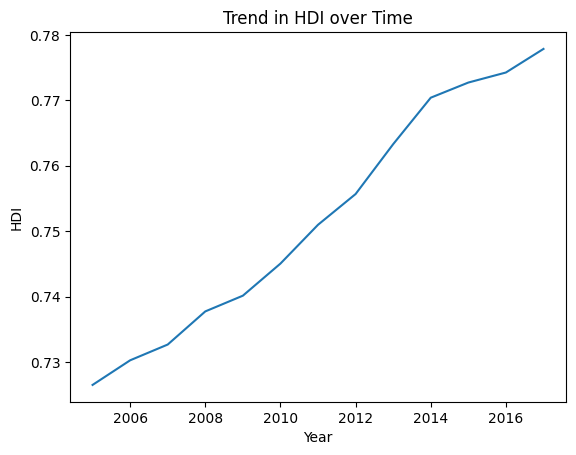

In [485]:
# Group the data by year and calculate the mean HDI value for each year
HDI_by_year = HumInd3.groupby('year')['HDI'].mean()

# Create a line plot of the mean HDI values over time
sns.lineplot(x=HDI_by_year.index, y=HDI_by_year)
plt.xlabel('Year')
plt.ylabel('HDI')
plt.title('Trend in HDI over Time')
plt.show()

The line plot shows a steady increase in the mean HDI value over time in Saint Kitts and Nevis. The straight line from the lower left-hand corner to the top right-hand corner indicates a consistent positive trend in HDI over the years. This suggests that Saint Kitts and Nevis has made progress in human development over time. However, it is important to note that the data only covers a relatively short period, from 1990 to 2019, and may not reflect long-term trends. It is also important to consider the limitations and assumptions of the data and analysis methods used to arrive at this conclusion.

This project was a prelude toward creating a human indicator development data lake for the island nation of Saint Kitts and Nevis.

The scope of the data lake is to provide a comprehensive analysis of human development indicators for Saint Kitts and Nevis over time. Its purpose is to inform and guide government policy makers in making informed decisions related to human development in the country.

The data lake can support several types of analysis and insights, including:
    
    Trend analysis: By analyzing the historical data on human development indicators over time, the data lake can help identify the overall trend in the country's human development.

    Correlation analysis: The data lake can help identify the factors that contribute the most to human development in Saint Kitts and Nevis. By examining the correlation between different human development indicators and identifying the most significant factors, policy makers can make more informed decisions about where to focus their efforts.

    Regression analysis: By conducting regression analysis, the data lake can help policy makers better understand the relationship between different human development indicators and how they have changed over time.

    Outlier analysis: The data lake can help identify outliers in the data that could have an impact on policy decisions.

    Visualization: The data lake can support visualization of the data to help policy makers understand the trends and patterns in the data more easily.

By providing these types of analysis and insights, the data lake can help policy makers make more informed decisions about how to allocate resources and where to focus their efforts to improve human development in Saint Kitts and Nevis.